## Data imputation using ML models ##
## XGBoost came out to be the best method to judge ##

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import missingno as mi
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.anova import anova_lm
import random
from statsmodels.formula.api import ols
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import statistics
from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [369]:
driver = pd.read_csv('/Users/rctrj/UCD/Winter/BAX 462/driver_df_final_PIT2020_revised_without_commonROIID.csv')

/Users/rctrj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,13,16,20,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
driver.columns

Index(['ROI_ID', 'ROI_FAMILY_ID', 'ZIPCODE', 'CURRENT_AGE', 'GENDER',
       'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'MRC_DATE', 'MRC_AMOUNT', 'MEMBERSHIP_JOIN_DATE',
       'MEMBERSHIP_RENEWAL_DATE', 'MEMBERSHIP_STATUS', 'MEMBERSHIP_TYPE',
       'STATUS', 'ACCOUNT_CLASSIFICATION', 'IND_12MO_SUMMARY_TOTALTRANS',
       'IND_12MO_SUMMARY_TOTALAMOUNT', 'FINITE_PLEDGE_ID',
       'FINITE_PLEDGE_PAYMENT_PLAN', 'FINITE_PLEDGE_END_DATE',
       'RECURRING_PLEDGE_ID', 'RECURRING_PLEDGE_PAYMENT_PLAN',
       'MEMBERSHIP_DURATION', 'MEMBERSHIP_JOIN_YEAR', 'AGE_AT_MEMBERSHIP',
       'MRC_YEAR', 'FIRST_GIFT_YEAR', 'MEMBERSHIP_RENEWAL_YEAR',
       'FINITE_PLEDGE_END_YEAR', 'Churn', 'TOTAL_TRANSACTIONS_MADE',
       'TOTAL_TRANSACTIONS_AMOUNT', 'AGE_AT_2020'],
      dtype='object')

In [6]:
driver.head()

,ROI_ID,ROI_FAMILY_ID,ZIPCODE,CURRENT_AGE,GENDER,DO_NOT_CONTACT,ADDRESS_CONTACT_STATUS,FIRST_GIFT_DATE,FIRST_GIFT_AMOUNT,MRC_DATE,...,MEMBERSHIP_JOIN_YEAR,AGE_AT_MEMBERSHIP,MRC_YEAR,FIRST_GIFT_YEAR,MEMBERSHIP_RENEWAL_YEAR,FINITE_PLEDGE_END_YEAR,Churn,TOTAL_TRANSACTIONS_MADE,TOTAL_TRANSACTIONS_AMOUNT,AGE_AT_2020
0,7401,7401,95448,69.0,FEMALE,N,Y,1983-01-01,35.0,2020-11-07,...,1983.0,31.0,2020.0,1983.0,2021,NaN,1.0,57.0,4331.0,68.0
1,8052,8052,94941,83.0,FEMALE,N,Y,1983-03-05,35.0,2020-12-29,...,1983.0,45.0,2020.0,1983.0,2020,NaN,1.0,50.0,3757.0,82.0
2,21162,21162,95014,76.0,NaN,N,Y,1983-03-21,35.0,2020-01-03,...,1983.0,38.0,2020.0,1983.0,2021,NaN,1.0,82.0,3120.0,75.0
3,21519,21519,95476,69.0,FEMALE,N,Y,1983-03-24,35.0,2020-02-21,...,1983.0,31.0,2020.0,1983.0,2021,NaN,1.0,25.0,2694.0,68.0
4,23564,23564,94903,72.0,FEMALE,N,Y,1983-03-16,35.0,2020-10-19,...,1983.0,34.0,2020.0,1983.0,2021,NaN,1.0,44.0,2068.0,71.0


In [381]:
x_columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'STATUS', "GENDER"]
y_columns = ['CURRENT_AGE']

z_columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'CURRENT_AGE', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'STATUS']

xx = driver[z_columns]
xx = xx[~pd.isna(xx['CURRENT_AGE'])] 


xx_train = xx.iloc[0:85000, :]


xx_train.columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'CURRENT_AGE', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'STATUS']

X = driver[x_columns]
Y = driver[y_columns]

X_partial = X[~pd.isna(Y['CURRENT_AGE'])] 
y_partial = Y[~pd.isna(Y['CURRENT_AGE'])]

print(len(X_partial.index))

X_partial = X = sm.add_constant(X_partial)


x_train = X_partial.iloc[0:85000, :]
y_train = y_partial.iloc[0:85000, :]




196577


In [135]:
fit = ols('CURRENT_AGE ~ MRC_AMOUNT + TOTAL_TRANSACTIONS_MADE + Churn + MEMBERSHIP_DURATION + MEMBERSHIP_TYPE + TOTAL_TRANSACTIONS_AMOUNT', data = xx_train).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CURRENT_AGE   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2118.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:46:20   Log-Likelihood:            -3.3616e+05
No. Observations:               85000   AIC:                         6.723e+05
Df Residuals:                   84990   BIC:                         6.724e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          59.9664      0.106    566.198      0.000      59.759      60.174
MEMBERSHIP_TYPE[T.LEADERSHIP_CIRCLE]               -2.6428      0.104    -25.520      0.000      -2.846      -2.440
MEMBERSHIP_TYPE[T.LEADERSHIP_CIRCLE_AMBASSADOR]    -4.0325      0.278    -14.508      0.000      -4.577      -3.488
MEMBERSHIP_TYPE[T.MID_LEVEL]                       -6.5243      0.569    -11.456      0.000      -7.640      -5.408
MEMBERSHIP_TYPE[T.PRESIDENTS_CIRCLE]             -157.5852     19.016     -8.287      0.000    -194.856    -120.314
MEMBERSHIP_TYPE[T.SIGNAL_SOCIETY]                  -2.6027      7.316     -0.356      0.722     -16.941      11.736
MRC_AMOUNT                                          0.0057      0.001     10.916      0.000       0.005       0.007
TOTAL_TRANSACTIONS_MADE                            -0.0228      0.001    -22.143      0.000      -0.025      -0.021
Churn                                               0.4544      0.107      4.254      0.000       0.245       0.664
MEMBERSHIP_DURATION                                 0.5065      0.004    127.913      0.000       0.499       0.514
==============================================================================
Omnibus:                      375.436   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.915
Skew:                          -0.054   Prob(JB):                     6.74e-64
Kurtosis:                       2.734   Cond. No.                     8.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Count'>

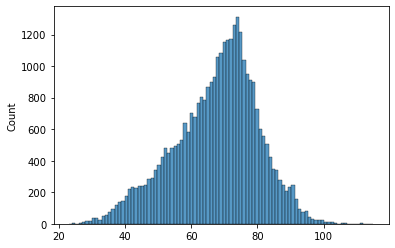

In [145]:
xx_test = xx.iloc[85000:, :]

flag = ['MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'MEMBERSHIP_TYPE', 'TOTAL_TRANSACTIONS_AMOUNT']

xx_test1 = xx_test[flag]

age_predict = list(fit.predict(xx_test1))


yy_test = xx_test['CURRENT_AGE']

age_test = list(yy_test)

sns.histplot(age_test)


In [146]:
### checking the RMSE value of linear regression ###

rmse = np.sqrt(mean_squared_error(age_test, age_predict))
print("RMSE: %f" % (rmse))


RMSE: 11.679704


In [143]:
yy_test

Series([], Name: CURRENT_AGE, dtype: float64)

<AxesSubplot:ylabel='Count'>

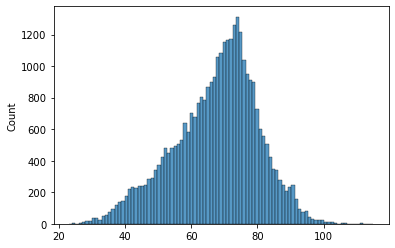

In [88]:
yy_test = xx.iloc[85000:, :]
yy_test = yy_test['CURRENT_AGE']

age = list(yy_test)
sns.histplot(age)

In [148]:
### using KNN to predict ####

x_columns = ['DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'TOTAL_TRANSACTIONS_AMOUNT']


### scaling the data ###

xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
xx['TOTAL_TRANSACTIONS_MADE'] = (xx['TOTAL_TRANSACTIONS_MADE']-xx['TOTAL_TRANSACTIONS_MADE'].mean())/xx['TOTAL_TRANSACTIONS_MADE'].std()
xx['MEMBERSHIP_DURATION'] = (xx['MEMBERSHIP_DURATION']-xx['MEMBERSHIP_DURATION'].mean())/xx['MEMBERSHIP_DURATION'].std()

xx['DO_NOT_CONTACT'] = list(1 if i == 'Y' else 0 for i in list(xx['DO_NOT_CONTACT']))
xx['ADDRESS_CONTACT_STATUS'] = list(1 if i == 'Y' else 0 for i in list(xx['ADDRESS_CONTACT_STATUS']))

X = xx[x_columns]
Y = xx['CURRENT_AGE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)


In [127]:
### creating XG boost regression model ###
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(max_iter=10000, tol=0.0001, max_depth=10, learning_rate=0.0300000012)
xgb_regressor.fit(X_train,y_train)

[19:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "max_iter", "tol" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0300000012,
             max_delta_step=0, max_depth=10, max_iter=10000, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tol=0.0001,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
preds = xgb_regressor.predict(X_test)

In [129]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.857524


In [130]:
### comparing training data with predction ##

  

RMSE: 0.794741


In [121]:
xx = driver[pd.isna(driver['CURRENT_AGE'])] 

columns = ['DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'TOTAL_TRANSACTIONS_AMOUNT']

xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
xx['TOTAL_TRANSACTIONS_MADE'] = (xx['TOTAL_TRANSACTIONS_MADE']-xx['TOTAL_TRANSACTIONS_MADE'].mean())/xx['TOTAL_TRANSACTIONS_MADE'].std()
xx['MEMBERSHIP_DURATION'] = (xx['MEMBERSHIP_DURATION']-xx['MEMBERSHIP_DURATION'].mean())/xx['MEMBERSHIP_DURATION'].std()

xx['DO_NOT_CONTACT'] = list(1 if i == 'Y' else 0 for i in list(xx['DO_NOT_CONTACT']))
xx['ADDRESS_CONTACT_STATUS'] = list(1 if i == 'Y' else 0 for i in list(xx['ADDRESS_CONTACT_STATUS']))




xx_age_test = xx[columns]


<AxesSubplot:ylabel='Count'>

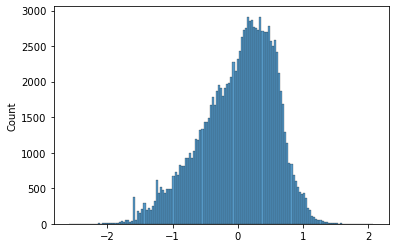

In [122]:

#### predicting values  for missing age ###

preds = xgb_regressor.predict(xx_age_test)
sns.histplot(list(preds))

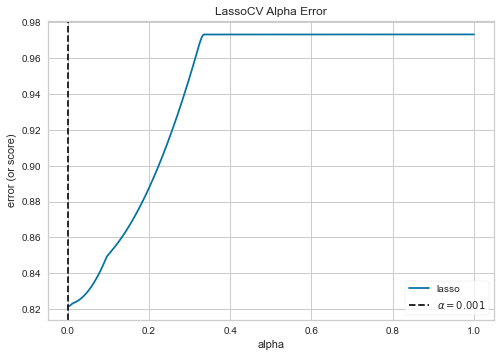

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [193]:
##### choosing the best alpha ####

alphas = list(np.arange(0.001, 1.0, 0.0001))
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model, cv = 10)
visualizer.fit(X_train, y_train)
visualizer.show()

In [195]:
### predicting using the alpha value of 0.001 ###


model = linear_model.Lasso(alpha=0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = abs(scores)
count += 1
print('Mean MAE: %.3f %.3f' % (mean(scores), i))

Mean MAE: 0.735 0.026


In [ ]:
##### XG boost seems to be performing the best ######

#### now we want to look at predicting gender #####

In [196]:
## applying logistic regression ##

In [303]:
z_columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'CURRENT_AGE', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'GENDER']

xx = driver[z_columns] 

### scaling the data ###

xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
xx['TOTAL_TRANSACTIONS_MADE'] = (xx['TOTAL_TRANSACTIONS_MADE']-xx['TOTAL_TRANSACTIONS_MADE'].mean())/xx['TOTAL_TRANSACTIONS_MADE'].std()
xx['MEMBERSHIP_DURATION'] = (xx['MEMBERSHIP_DURATION']-xx['MEMBERSHIP_DURATION'].mean())/xx['MEMBERSHIP_DURATION'].std()

xx['DO_NOT_CONTACT'] = list(1 if i == 'Y' else 0 for i in list(xx['DO_NOT_CONTACT']))
xx['ADDRESS_CONTACT_STATUS'] = list(1 if i == 'Y' else 0 for i in list(xx['ADDRESS_CONTACT_STATUS']))


xx = xx[~pd.isna(xx['GENDER'])]

columns = ['DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'TOTAL_TRANSACTIONS_AMOUNT']


X = xx[columns]
Y = xx['GENDER']
Y = list(1 if i == "MALE" else 0 for i in list(Y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

<ipython-input-303-05d8274eef3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
<ipython-input-303-05d8274eef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
<ipython-input-303-05d8274eef3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [280]:
logit_model = sm.Logit(y_test, sm.add_constant(X_test)).fit()

Optimization terminated successfully.
         Current function value: 0.664066
         Iterations 6


In [281]:
### predicting ###

df = pd.DataFrame(list(1 if i > 0.5 else 0 for i in list(logit_model.predict(sm.add_constant(X_test)))))
df = df.rename(columns = {0:'Prediction'})
prediction = df.groupby('Prediction')['Prediction'].count()
prediction

print("*******  Prediction *******")
print(prediction)
print("*******  Actual  **********")
y = pd.DataFrame(y_test).reset_index()
y.columns = ['index','Outcome']
print(pd.DataFrame(y).groupby('Outcome')['Outcome'].count())

*******  Prediction *******
Prediction
0    18256
1      539
Name: Prediction, dtype: int64
*******  Actual  **********
Outcome
0    11432
1     7363
Name: Outcome, dtype: int64


In [282]:
confusion_matrix(y_test, df['Prediction'])

array([[11196,   236],
       [ 7060,   303]])

In [258]:
#### applying random forest ####

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
prediction = pd.DataFrame(clf.predict(X_test))
prediction.groupby(0)[0].count()

0
0    18787
1        8
Name: 0, dtype: int64

In [261]:
y = pd.DataFrame(y_test).reset_index()
y.columns = ['index','Outcome']
y.groupby('Outcome')['Outcome'].count()

Outcome
0    11498
1     7297
Name: Outcome, dtype: int64

In [283]:
#### applying xgboost ####

xgb_regressor = xgb.XGBRegressor(max_iter=1000, tol=0.0001, max_depth=10, learning_rate=0.0300000012)
xgb_regressor.fit(X_train,y_train)


[21:13:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "max_iter", "tol" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0300000012,
             max_delta_step=0, max_depth=10, max_iter=1000, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tol=0.0001,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [284]:
prediction = xgb_regressor.predict(X_test)
prediction = pd.DataFrame(list(1 if i > 0.60 else 0 for i in list(prediction)))
prediction.groupby(0)[0].count()

0
0    18630
1      165
Name: 0, dtype: int64

In [285]:
confusion_matrix(y_test, prediction)

array([[11360,    72],
       [ 7270,    93]])

## predicting actual gender on the missing values ##

In [361]:



z_columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'CURRENT_AGE', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'GENDER']

xx = driver[z_columns] 

### scaling the data ###

xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
xx['TOTAL_TRANSACTIONS_MADE'] = (xx['TOTAL_TRANSACTIONS_MADE']-xx['TOTAL_TRANSACTIONS_MADE'].mean())/xx['TOTAL_TRANSACTIONS_MADE'].std()
xx['MEMBERSHIP_DURATION'] = (xx['MEMBERSHIP_DURATION']-xx['MEMBERSHIP_DURATION'].mean())/xx['MEMBERSHIP_DURATION'].std()

xx['DO_NOT_CONTACT'] = list(1 if i == 'Y' else 0 for i in list(xx['DO_NOT_CONTACT']))
xx['ADDRESS_CONTACT_STATUS'] = list(1 if i == 'Y' else 0 for i in list(xx['ADDRESS_CONTACT_STATUS']))


xx = xx[pd.isna(xx['GENDER'])]

columns = ['DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'TOTAL_TRANSACTIONS_AMOUNT']


X = xx[columns]
Y = xx['GENDER']

prediction = xgb_regressor.predict(X)
prediction = list(1 if i > 0.60 else 0 for i in list(prediction))

<ipython-input-361-34b00d3cdd8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
<ipython-input-361-34b00d3cdd8a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
<ipython-input-361-34b00d3cdd8a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [370]:
prediction = list("MALE" if i == 1 else "FEMALE" for i in prediction)
driver.loc[pd.isna(driver['GENDER']), 'GENDER'] = prediction

In [327]:
## predicting age for missing values ##

z_columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'CURRENT_AGE', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'GENDER']

xx = driver[z_columns] 

### scaling the data ###

xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
xx['TOTAL_TRANSACTIONS_MADE'] = (xx['TOTAL_TRANSACTIONS_MADE']-xx['TOTAL_TRANSACTIONS_MADE'].mean())/xx['TOTAL_TRANSACTIONS_MADE'].std()
xx['MEMBERSHIP_DURATION'] = (xx['MEMBERSHIP_DURATION']-xx['MEMBERSHIP_DURATION'].mean())/xx['MEMBERSHIP_DURATION'].std()

xx['DO_NOT_CONTACT'] = list(1 if i == 'Y' else 0 for i in list(xx['DO_NOT_CONTACT']))
xx['ADDRESS_CONTACT_STATUS'] = list(1 if i == 'Y' else 0 for i in list(xx['ADDRESS_CONTACT_STATUS']))


xx = xx[~pd.isna(xx['CURRENT_AGE'])]

columns = ['DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'TOTAL_TRANSACTIONS_AMOUNT']


mean_age = xx['CURRENT_AGE'].mean()
std_age = xx['CURRENT_AGE'].std()


X = xx[columns]
Y = xx['CURRENT_AGE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

<ipython-input-327-113c998efaf1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
<ipython-input-327-113c998efaf1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
<ipython-input-327-113c998efaf1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [328]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(max_iter=10000, tol=0.0001, max_depth=10, learning_rate=0.0300000012)
xgb_regressor.fit(X_train,y_train)
preds = xgb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[21:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "max_iter", "tol" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE: 0.860178


In [375]:
## predicting age for missing values ##

z_columns = ['ZIPCODE', 'DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_TYPE', 'MEMBERSHIP_DURATION', 'CURRENT_AGE', 'MEMBERSHIP_JOIN_YEAR', 'TOTAL_TRANSACTIONS_AMOUNT', 'GENDER']

xx_z = driver[z_columns] 
mean_age = xx_z['CURRENT_AGE'].mean()
std_age = xx_z['CURRENT_AGE'].std()

xx = driver[z_columns] 

### scaling the data ###

xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
xx['TOTAL_TRANSACTIONS_MADE'] = (xx['TOTAL_TRANSACTIONS_MADE']-xx['TOTAL_TRANSACTIONS_MADE'].mean())/xx['TOTAL_TRANSACTIONS_MADE'].std()
xx['MEMBERSHIP_DURATION'] = (xx['MEMBERSHIP_DURATION']-xx['MEMBERSHIP_DURATION'].mean())/xx['MEMBERSHIP_DURATION'].std()

xx['DO_NOT_CONTACT'] = list(1 if i == 'Y' else 0 for i in list(xx['DO_NOT_CONTACT']))
xx['ADDRESS_CONTACT_STATUS'] = list(1 if i == 'Y' else 0 for i in list(xx['ADDRESS_CONTACT_STATUS']))




xx = xx[pd.isna(xx['CURRENT_AGE'])]

columns = ['DO_NOT_CONTACT', 'ADDRESS_CONTACT_STATUS', 'MRC_AMOUNT', 'TOTAL_TRANSACTIONS_MADE', 'Churn', 'MEMBERSHIP_DURATION', 'TOTAL_TRANSACTIONS_AMOUNT']




X = xx[columns]

preds = xgb_regressor.predict(X)

print(preds)

preds = list(i*std_age+mean_age for i in preds)



<ipython-input-375-97dd152d5400>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['MRC_AMOUNT'] = (xx['MRC_AMOUNT']-xx['MRC_AMOUNT'].mean())/xx['MRC_AMOUNT'].std()
<ipython-input-375-97dd152d5400>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['CURRENT_AGE'] = (xx['CURRENT_AGE']-xx['CURRENT_AGE'].mean())/xx['CURRENT_AGE'].std()
<ipython-input-375-97dd152d5400>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

[ 0.760234    0.8073455   0.7864921  ...  0.15186322 -0.00402596
 -0.28596067]


In [378]:
### putting it inside data ###

driver.loc[pd.isna(driver['CURRENT_AGE']), 'CURRENT_AGE'] = preds

AxesSubplot(0.125,0.125;0.775x0.755)


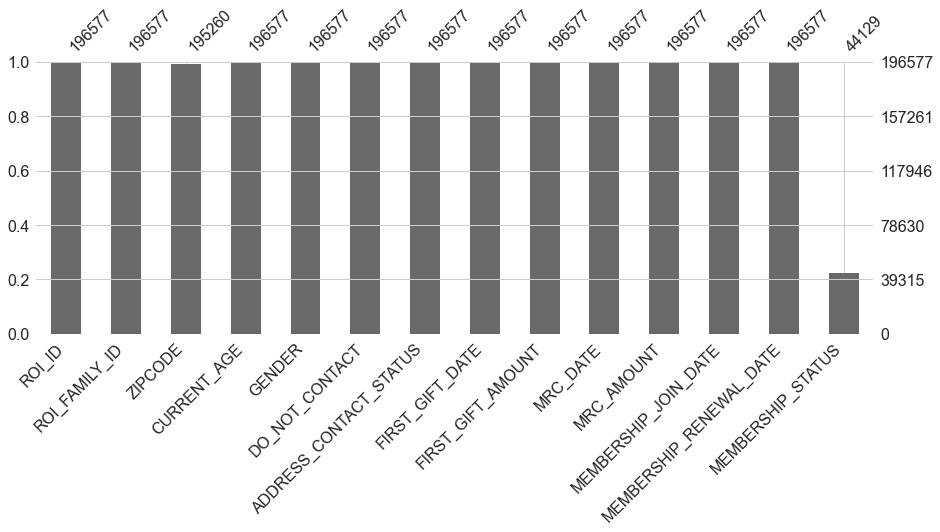

In [379]:
#### checking if all the valuea are imputated ####

print(mi.bar(driver.iloc[:,0:14], figsize = (15,5)))

In [380]:
### saving the file ####

driver.to_csv('/Users/rctrj/UCD/Winter/BAX 462/imputated_driver.csv')